In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from utils.drawing import draw_lines, draw_points
from utils.lines_detector import LinesDetector
from detectors.chessboard_detector import ChessboardDetector

In [2]:
# Load the image
image_path = 'test/in/14.jpg'
original_image = cv.imread(image_path, cv.IMREAD_COLOR)
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

In [3]:
chessboard_detector = ChessboardDetector()
resized_image = chessboard_detector.set_image(original_image)

old_lines, old_intersections, old_corners = chessboard_detector.detect_components()
original_image_with_lines = chessboard_detector.draw()

transformed_image = chessboard_detector.transform()
chessboard_detector.detect_components()
transformed_image_with_lines = chessboard_detector.draw()

transformed_image2 = chessboard_detector.transform()
chessboard_detector.detect_components()
transformed_image_with_lines2 = chessboard_detector.draw()

# Results:

In [4]:
canny_image = LinesDetector.canny(gray_image)

hough_image = np.zeros_like(resized_image)
hough_image = draw_lines(hough_image, old_lines, color=(255, 255, 255))
hough_image = draw_points(hough_image, old_intersections)

print('Number of lines:', len(old_lines))
print('Number of intersections:', len(old_intersections))
print('Corners: ', old_corners)

Number of lines: 59
Number of intersections: 40
Corners:  ([16, 150], [10, 496], [352, 143], [393, 475])


Plot the results of the simulation.

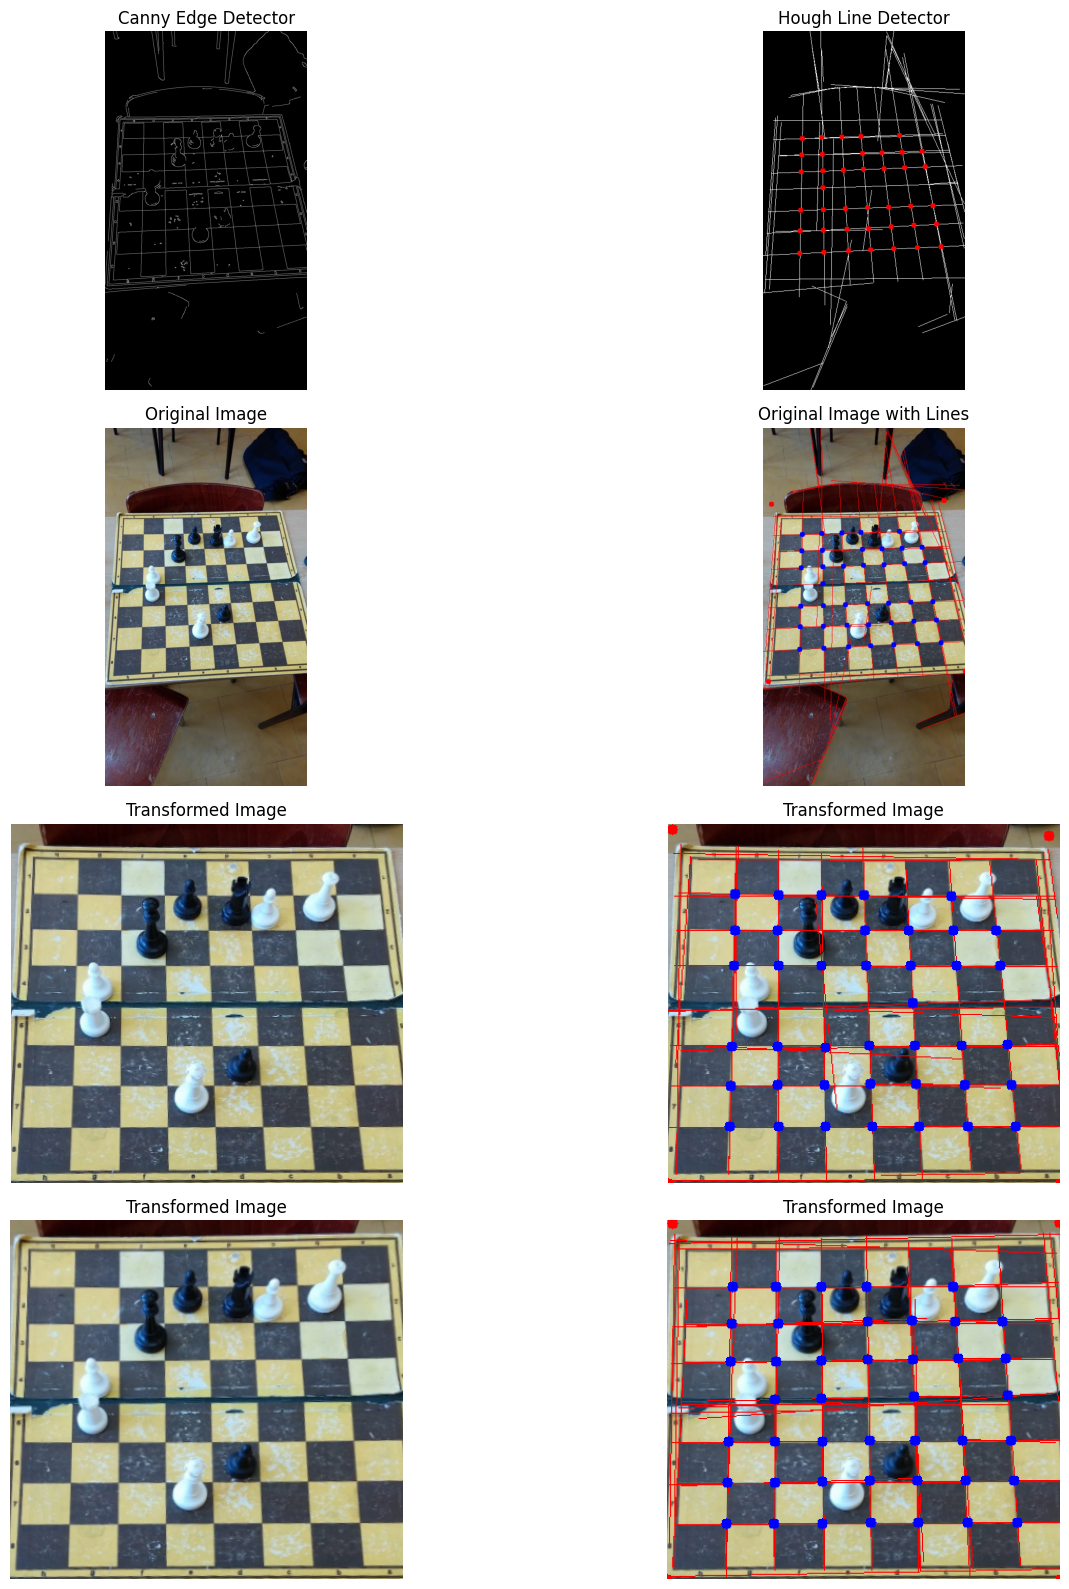

In [5]:
plt.figure(figsize=(16, 16))

plt.subplot(4, 2, 1)
plt.imshow(canny_image, cmap='gray')
plt.title('Canny Edge Detector')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(hough_image, cmap='gray')
plt.title('Hough Line Detector')
plt.axis('off')

plt.subplot(4, 2, 3)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(cv.cvtColor(original_image_with_lines, cv.COLOR_BGR2RGB))
plt.title('Original Image with Lines')
plt.axis('off')

plt.subplot(4, 2, 5)
plt.imshow(cv.cvtColor(transformed_image, cv.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(cv.cvtColor(transformed_image_with_lines, cv.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(4, 2, 7)
plt.imshow(cv.cvtColor(transformed_image2, cv.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(cv.cvtColor(transformed_image_with_lines2, cv.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.savefig('results/chessboard_detection.png')
plt.show()